In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2024-06-22 21:34:22.151741: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [4]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

In [6]:
pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_12_0_x86_64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_12_0_x86_64.whl (56.5 MB)
Note: you may need to restart the kernel to use updated packages.


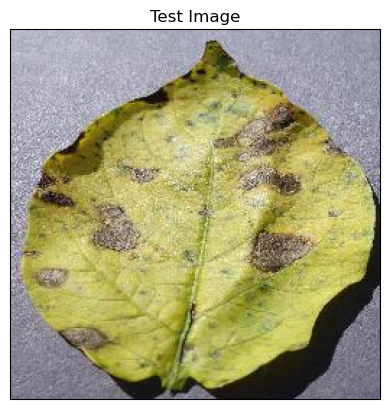

In [35]:
#Test Image Visualization
import cv2
image_path = 'test/test/PotatoEarlyBlight4.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [36]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [37]:
print(predictions)

[[2.13311258e-09 3.46493315e-13 2.38589315e-10 1.50479195e-11
  7.39812725e-13 1.07844971e-06 9.72216353e-14 4.73223023e-12
  3.21337013e-10 1.76211021e-12 1.42123489e-14 3.64868294e-15
  8.96844827e-13 1.13268497e-08 2.61942991e-15 1.95805368e-11
  7.03565624e-13 9.29051232e-15 1.82172698e-06 5.40865313e-13
  9.99982238e-01 1.68904810e-12 2.17967788e-13 5.91578102e-15
  1.38124934e-14 6.46264249e-12 1.48438594e-05 1.59685134e-12
  2.63467887e-14 1.55176271e-11 4.54844074e-09 3.40233863e-09
  1.31268010e-08 1.53568264e-16 1.37418397e-13 3.49997381e-15
  1.29565389e-15 1.56755598e-11]]


In [38]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

20


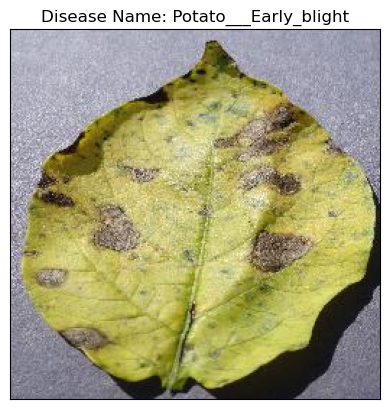

In [39]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()